The intention of this notebook is to ***sample data*** from the  T96 dataset provided by Merck&Co. 
This time the naming of the columns is standartized. Additionally, the ordering of the columns is now consistent.

##Notebook Setup##

In [0]:
#Imports:
import os
import numpy as np
import pandas as pd

In [0]:
#Connect to google drive:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Set up file paths:
data_folder_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/Source/"
merck_and_co_excel_loc = data_folder_loc + "merck_and_co.xls"
target_data_folder_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T96/paper_datasets_T96/"
print(os.path.isdir(data_folder_loc))
print(os.path.isdir(target_data_folder_loc))
print(os.path.isfile(merck_and_co_excel_loc))

True
True
True


## Sample Data ##

In [0]:
#Read excel table T1626:
T1626_table = pd.read_excel(io=merck_and_co_excel_loc, sheet_name=0, header=0)
T96_table = pd.read_excel(io=merck_and_co_excel_loc, sheet_name=2, header=0)

### Make column naming consistent:

In [0]:
#To be expected not available, because additional info from Hot MuSiC:
unavailable_hm = ["wt",	"resi",	"mut",	"pdbId",	"protein", "proteinAbbreviation",	"proteinCommon",	"Organism",	"source",	"ddG",	"ΔTmexp",	"Tmexp [wt]",	"ΔΔHmexp",	"ΔHmexp [wt]",	"ΔΔCPexp",	"ΔCPexp [wt]",	"ΔΔGexp(T)",	"T",	"Nres",	"R (Å)",	"Ref.",	"pH",	"Exp.Tech.",	"wtPolarity",	"mutPolarity"]

In [0]:
#remove characters from column heads that could cause problems:
T1626_table.columns = map(lambda x: x.replace("[", "").replace("]", "").replace(">", "_greater_").replace("<", "_smaller_").replace(" ", "_").replace(".", "_").replace("Δ", "delta_").replace("Å", "A").replace("(", "_").replace(")", "_"), T1626_table.columns)
T96_table.columns = map(lambda x: x.replace("[", "").replace("]", "").replace(">", "_greater_").replace("<", "_smaller_").replace(" ", "_").replace(".", "_").replace("Δ", "delta_").replace("Å", "A").replace("(", "_").replace(")", "_"), T96_table.columns)
unavailable_hm = map(lambda x: x.replace("[", "").replace("]", "").replace(">", "_greater_").replace("<", "_smaller_").replace(" ", "_").replace(".", "_").replace("Δ", "delta_").replace("Å", "A").replace("(", "_").replace(")", "_"), unavailable_hm)

In [0]:
#cast every string to lowercase:
new_columns_T1626 = list(map(lambda x: x.lower(), T1626_table.columns))

special_naming = ["EFF_VDW",	"EFF_ELC",	"ESG",	"ESELF",	"H_EMA",	"H_EMD",	"A_ACC",	"A_DON",	"A_ASA_P",	"B_ROTN",	"A_NH",	"GLY",	"A_HEAVY"]
new_columns_T96 = list(map(lambda x: "d"+x if x in special_naming else x, T96_table.columns))
new_columns_T96 = list(map(lambda x: x.lower(), new_columns_T96))

unavailable_hm = list(map(lambda x: x.lower(), unavailable_hm))

In [0]:
T1626_table.columns = new_columns_T1626
T96_table.columns = new_columns_T96

### Check availability of columns:

In [0]:
print(len(new_columns_T1626))
print(len(new_columns_T96))
print(len(new_columns_T1626)-len(new_columns_T96))
print(len(unavailable_hm))

187
187
0
25


In [0]:
#Figure out what columns are missing:
tmp_diff_set = (set(new_columns_T1626)-set(new_columns_T96))-set(unavailable_hm)
tmp_diff_set
#ok: wtss (missing), variant polarity (not used anyway because textual and redundant (also not associated))

{'variant_polarity'}

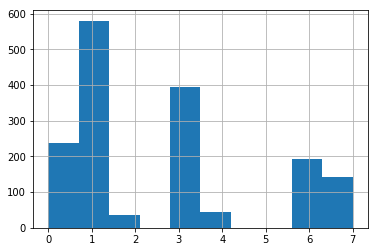

In [0]:
T1626_table["wtss"].hist()

In [0]:
#Figure out what columns are new:
tmp_diff_set_02 = (set(new_columns_T96)-set(new_columns_T1626))
tmp_diff_set_02

{'bl_tie_pred',
 'bl_tie_slg_pred',
 'cart_tie_pred',
 'cart_tie_slg_pred',
 'dcoeff_diff',
 'dmass',
 'ds_nonpolar',
 'ds_tie_pred',
 'ds_tie_slg_pred',
 'g_pred',
 'gkase_mutcount',
 'l_pred',
 'lg_pred',
 'moe_tie_pred',
 'moe_tie_slg_pred',
 'mono_tie_pred',
 'mono_tie_slg_pred',
 'pucci_mutcount',
 's_pred',
 'sg_pred',
 'sl_pred',
 'slg_pred',
 'variant',
 'variantpolarity'}

In [0]:
#Figure out what columns are new: (without pred)
tmp_diff_set_03 = list(filter(lambda x: not "pred" in x,(set(new_columns_T96)-set(new_columns_T1626))))
tmp_diff_set_03

['variant',
 'gkase_mutcount',
 'ds_nonpolar',
 'dmass',
 'variantpolarity',
 'dcoeff_diff',
 'pucci_mutcount']

In [0]:
#Columns that should be unavailable but in there anyways:
set(unavailable_hm)-(set(unavailable_hm)-set(new_columns_T96))

{'mut', 'wt'}

### Define semantically grouped lists of features (features_type_L replaced with features_type_L_available)  ###


In [0]:
########################################
target_label = 'dtm'

sequence_identity_related_columns = ['Mutation', 'dtm', 'wt', 'resi', 'mut', 'pdbId', 'protein']

features_type_A = ['beta_first', 'beta_second', 'beta_diff', 'alpha_first', 'alpha_second', 'alpha_diff', 'coil_first', 'coil_second', 'coil_diff', 'mutability_first', 'mutability_second', 'mutability_diff', 'flexibility_first', 'flexibility_second', 'flexibility_diff', 'aromatic_first', 'aromatic_second', 'aromatic_diff', 'polarity_first', 'polarity_second', 'polarity_diff', 'pi_first', 'pi_second', 'pi_diff', 'consensus_hydrophobicity_first', 'consensus_hydrophobicity_second', 'consensus_hydrophobicity_diff', 'hydrophobicity_first', 'hydrophobicity_second', 'hydrophobicity_diff', 'bulkiness_first', 'bulkiness_second', 'bulkiness_diff', 'mol_wt_first', 'mol_wt_second', 'mol_wt_diff', 'vdw_vol_first', 'vdw_vol_second', 'vdw_vol_diff', 'branched_first', 'branched_second', 'branched_diff', 'logd_first', 'logd_second', 'logd_diff', 'charge_first', 'charge_second', 'charge_diff', 'polarity2_first', 'polarity2_second', 'polarity2_diff', 'dg_o_w_first', 'dg_o_w_second', 'dg_o_w_diff']
features_type_L = ['wtss', 'totalarea', 'fractionburied', 'hydrophobicratio', 'hydrophobicarea']
# version where wtss is excluded, because its not available in all sub datasets
features_type_L_available = ['totalarea', 'fractionburied', 'hydrophobicratio', 'hydrophobicarea'] 
features_type_L = features_type_L_available #REPLACED BECAUSE NOT AVAILABLE IN 251
features_type_G = ['dmobility', 'ddipole_moment', 'dasa_vdw', 'deccen', 'dasa_hph', 'dhelicity', 'dzdipole', 'dr_solv', 'dapp_charge', 'dsed_const', 'dpi_3d', 'dzquadrupole', 'dasa_hyd', 'dzeta', 'dhenry', 'dpi_seq', 'dnet_charge', 'dvolume', 'dcoeff_fric', 'dr_gyr', 'ddebye', 'dhyd_moment', 'dcoeff_280']

feature_variant_polarity = 'variant_polarity'
features_energy_BL = ['r_bioluminate_delta_Stability_Solv_SA', 'r_bioluminate_delta_Stability_SelfCont', 'r_bioluminate_delta_Stability_Packing', 'r_bioluminate_delta_Stability_Covalent', 'r_bioluminate_delta_Stability_Reference', 'r_bioluminate_delta_Stability_vdW', 'r_bioluminate_delta_Stability_Hbond', 'r_bioluminate_delta_Stability_Coulomb', 'r_bioluminate_delta_Stability_Solv_GB', 'r_bioluminate_delta_Stability_Lipo', 'r_bioluminate_delta_Stability']
feature_energy_ddG_BL = 'r_bioluminate_delta_Stability' #PRObABLY?
features_energy_CART = ['cart_ddg', 'cart_fa_dun_dev', 'cart_cart_bonded', 'cart_fa_intra_sol_xover4', 'cart_dslf_fa13', 'cart_fa_intra_elec', 'cart_fa_dun_semi', 'cart_hbond_sr_bb', 'cart_fa_sol', 'cart_lk_ball_bridge', 'cart_rama_prepro', 'cart_hbond_sc', 'cart_hbond_lr_bb', 'cart_lk_ball_bridge_uncpl', 'cart_hbond_bb_sc', 'cart_lk_ball_iso', 'cart_fa_intra_rep_xover4', 'cart_fa_atr', 'cart_fa_rep', 'cart_lk_ball', 'cart_fa_dun_rot', 'cart_omega', 'cart_ref', 'cart_hxl_tors', 'cart_fa_intra_atr_xover4', 'cart_p_aa_pp', 'cart_fa_elec']
feature_energy_ddG_CART = 'cart_ddg'
features_energy_DS = ['ds_vdw', 'ds_elec', 'ds_entropy', 'ds_ddg', 'dS']
feature_energy_ddG_DS = 'ds_ddg'
features_energy_MOE = ['dasa', 'dEff_vdw', 'dEff_elc', 'dEsg', 'dEself', 'dh_ema', 'dh_emd', 'da_acc', 'da_don', 'da_asa_p', 'db_rotN', 'da_nH', 'dgly', 'da_heavy']
#feature_energy_ddG_MOE = #DONT KNOW REALLY?
#PROBLEM WITH MONO: DOCUMENTATION AND DATASET DONT MATCH, HOWEVER, DATASET CONSISTENT IN IT SELF
features_energy_MONO = ['mono_ddg', 'mono_fa_atr', 'mono_fa_rep', 'mono_fa_sol', 'mono_fa_intra_rep', 'mono_pro_close', 'mono_fa_pair', 'mono_hbond_sr_bb', 'mono_hbond_lr_bb', 'mono_hbond_bb_sc', 'mono_hbond_sc', 'mono_dslf_ss_dst', 'mono_dslf_cs_ang', 'mono_dslf_ss_dih', 'mono_dslf_ca_dih', 'mono_rama', 'mono_omega', 'mono_fa_dun', 'mono_p_aa_pp', 'mono_ref']
feature_energy_ddG_MONO = 'mono_ddg'

featrures_ALG_CART_tiE = features_type_A + features_type_L + features_type_G + features_energy_CART
features_all_used_by_paper = features_type_A + features_type_L + features_type_G + features_energy_BL + features_energy_CART + features_energy_DS + features_energy_MOE + features_energy_MONO
features_ALG = features_type_A + features_type_L + features_type_G 
features_E = features_energy_BL + features_energy_CART + features_energy_DS + features_energy_MOE + features_energy_MONO

HM_features = ['proteinAbbreviation', 'proteinCommon', 'Organism', 'source', 'ddG', 'delta_Tmexp', 'Tmexp_wt', 'delta_delta_Hmexp', 'delta_Hmexp_wt', 'delta_delta_CPexp', 'delta_CPexp_wt', 'delta_delta_Gexp_T_', 'T', 'Nres', 'R__A_', 'Ref_', 'pH', 'Exp_Tech_', 'wtPolarity', 'mutPolarity']
HM_feature_sequemce_Tm = 'Tmexp_wt'
HM_feature_organism_growth_T = 'T'
HM_feature_organism_pH = 'pH'
HM_feature_sequence_len = 'Nres'
HM_features_promising = [HM_feature_sequemce_Tm,HM_feature_organism_growth_T,HM_feature_organism_pH,HM_feature_sequence_len]

#features that dont make sense to use beacuase they would probably not be available beforehand:
HM_unrealistic_potentially_useful_features = ['ddG','delta_delta_Hmexp', 'delta_delta_CPexp']
#features that I dont really know what they mean
HM_potentially_useful_features = ['delta_Hmexp_wt', 'delta_CPexp_wt']

features_all_available_that_make_sense = features_all_used_by_paper + HM_features_promising

In [0]:
#transform feature lists to consistent naming and ordering
featrures_ALG_CART_tiE = map(lambda x: x.replace("[", "").replace("]", "").replace(">", "_greater_").replace("<", "_smaller_").replace(" ", "_").replace(".", "_").replace("Δ", "delta_").replace("Å", "A").replace("(", "_").replace(")", "_"), featrures_ALG_CART_tiE)
featrures_ALG_CART_tiE = list(map(lambda x: x.lower(), featrures_ALG_CART_tiE))
featrures_ALG_CART_tiE.sort()

features_all_used_by_paper = map(lambda x: x.replace("[", "").replace("]", "").replace(">", "_greater_").replace("<", "_smaller_").replace(" ", "_").replace(".", "_").replace("Δ", "delta_").replace("Å", "A").replace("(", "_").replace(")", "_"), features_all_used_by_paper)
features_all_used_by_paper = list(map(lambda x: x.lower(), features_all_used_by_paper))
features_all_used_by_paper.sort()

features_ALG = map(lambda x: x.replace("[", "").replace("]", "").replace(">", "_greater_").replace("<", "_smaller_").replace(" ", "_").replace(".", "_").replace("Δ", "delta_").replace("Å", "A").replace("(", "_").replace(")", "_"), features_ALG)
features_ALG = list(map(lambda x: x.lower(), features_ALG))
features_ALG.sort()

features_E = map(lambda x: x.replace("[", "").replace("]", "").replace(">", "_greater_").replace("<", "_smaller_").replace(" ", "_").replace(".", "_").replace("Δ", "delta_").replace("Å", "A").replace("(", "_").replace(")", "_"), features_E)
features_E = list(map(lambda x: x.lower(), features_all_used_by_paper))
features_E.sort()

### Create data for XGBoost ###

In [0]:
#create target label 
T96_table[[target_label]].to_csv(target_data_folder_loc+"y_label_xgboost_T96.csv", index=False)

In [0]:
#create paper features array
T96_table[features_all_used_by_paper].to_csv(target_data_folder_loc+"X_paper_xgboost_T96.csv", index=False)

In [0]:
#create ALG_cart_tiE
T96_table[featrures_ALG_CART_tiE].to_csv(target_data_folder_loc+"X_paper_ALG_CART_tiE_xgboost_T96.csv", index=False)

In [0]:
#create ALG
T96_table[features_ALG].to_csv(target_data_folder_loc+"X_paper_ALG_xgboost_T96.csv", index=False)

In [0]:
#create E
T96_table[features_E].to_csv(target_data_folder_loc+"X_paper_E_xgboost_T96.csv", index=False)